## Ejercicio

1. Visualiza el dataset de las flores (`load_iris`) utilizando las funciones que tienes más abajo. ¿Hay alguna forma clara de separar las tres especies de flores?
2. Separa el dataset en matriz de características `features` y vector de etiquetas `labels`. Conviértelos a arrays de NumPy usando `.as_matrix()`.
3. Reduce la dimensionalidad del dataset a 2 usando `sklearn.manifold.Isomap` o `sklearn.decomposition.PCA` y usa un algoritmo de clustering con 3 clusters. ¿Se parecen los clusters que aparecen a los grupos originales?
4. Predice el tipo de flor usando un algoritmo de clasificación. Visualiza la matriz de confusión. ¿Cuál es el porcentaje de aciertos del algoritmo? ¿Es más certero en algún tipo de flor en concreto? ¿Concuerda esto con lo que pensaste en el apartado 1?

## Solución

In [77]:
from sklearn.datasets import load_iris

**1. Visualiza el dataset de las flores (`load_iris`) utilizando las funciones que tienes más abajo. ¿Hay alguna forma clara de separar las tres especies de flores?**

In [78]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [79]:
iris = load_iris()

In [80]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

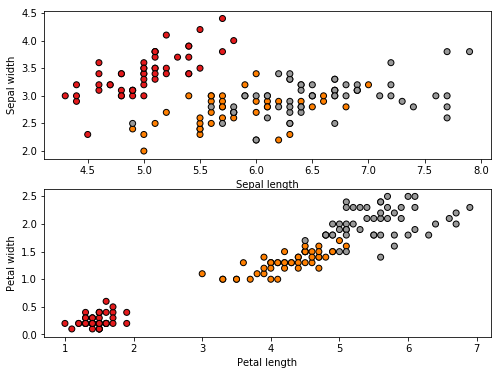

In [81]:
X = iris.data[:, :4]
y = iris.target

plt.figure(1, figsize=(8, 6))
#plt.clf()
plt.subplot(211)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.subplot(212)
plt.scatter(X[:, 2], X[:, 3], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.show()

**2.Separa el dataset en matriz de características features y vector de etiquetas labels. Conviértelos a arrays de NumPy usando .as_matrix().**

In [82]:
features = iris.data[:, :2]
labels = iris.target

features_array = np.asmatrix(features)
labels = np.asmatrix(labels)


**3.Reduce la dimensionalidad del dataset a 2 usando sklearn.manifold.Isomap o sklearn.decomposition.PCA y usa un algoritmo de clustering con 3 clusters. ¿Se parecen los clusters que aparecen a los grupos originales?**

Reduciendo la dimensionalidad a 2 usando sklearn.manifold.isomap

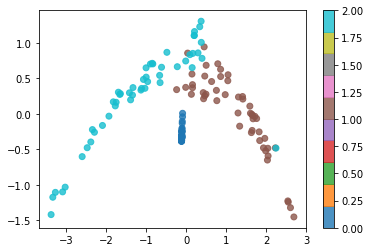

In [106]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
model.fit(iris.data)
iris_proj = model.transform(iris.data)


plt.scatter(iris_proj[:, 0], iris_proj[:, 1],
            c=iris.target, cmap=plt.cm.Vega10, alpha=0.8)
plt.colorbar()

In [108]:
features= iris_proj

Usando un algoritmo de clustering

In [109]:
from sklearn.cluster import KMeans

In [110]:
model = KMeans(n_clusters=3)
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
model.fit(features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [112]:
centroids = model.cluster_centers_
centroids

array([[-0.07378218,  0.14634374],
       [ 1.78033518, -0.27930967],
       [-2.18334179, -0.25167013]])

In [113]:
labels_pred = model.predict(features)

In [118]:
# preserve
xmin, xmax = features[:, 0].min(), features[:, 0].max()
ymin, ymax = features[:, 1].min(), features[:, 1].max()

xx, yy = np.meshgrid(
    np.linspace(xmin, xmax),
    np.linspace(ymin, ymax)
)

mesh = np.c_[xx.ravel(), yy.ravel()]
mesh

array([[-3.37539453, -1.45232003],
       [-3.25164455, -1.45232003],
       [-3.12789457, -1.45232003],
       ...,
       [ 2.4408546 ,  1.30647926],
       [ 2.56460458,  1.30647926],
       [ 2.68835457,  1.30647926]])

In [115]:
Z = model.predict(mesh)

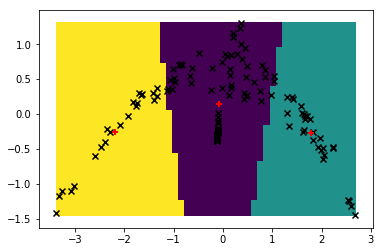

In [116]:
# http://pybonacci.org/2015/01/14/introduccion-a-machine-learning-con-python-parte-1/
plt.pcolormesh(xx, yy, Z.reshape(xx.shape))

plt.scatter(features[:, 0], features[:, 1], marker='x', color='k') 
plt.scatter(centroids[:, 0], centroids[:, 1], marker='+', color='r', lw=2)

**4. Predice el tipo de flor usando un algoritmo de clasificación. Visualiza la matriz de confusión. ¿Cuál es el porcentaje de aciertos del algoritmo? ¿Es más certero en algún tipo de flor en concreto? ¿Concuerda esto con lo que pensaste en el apartado 1?**

In [126]:
from sklearn import tree
from sklearn.model_selection import train_test_split

iris = load_iris()



In [127]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=0)

In [129]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [133]:
pred = clf.predict(X_test)

Matriz de confusión

In [134]:
from sklearn.metrics import confusion_matrix

In [141]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [144]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


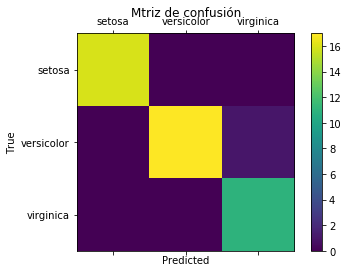

In [145]:
labels = ['setosa', 'versicolor', 'virginica']
cm = confusion_matrix(y_true = y_test, y_pred = pred)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Mtriz de confusión')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Solo se equivocó en uno, clasificó a un versicolor como virgínica
